In preparing this tutorial, I came to the conclusion that ANOVA in Python is a lot more difficult than it needs to be! So little consistency in syntax and output! Just as I was about to give up hope, I discovered the `pingouin` package, which I think does a pretty good job of simplifying things. What it does under the hood is to take a bunch of the already-existing, but diverse and inconsistent packages, and puts a nicer, simpler wrapper on top of them. So, before we get started, we will need to install `pingouin`:

In [ ]:
pip install pingouin

## One-way ANOVA

We use one-way ANOVA when we have multiple groups that we are comparing on a single measure. As an example, we can use the clinical trial data from the Learning Statistics with Python book. As always, we can start by importing the packages we need, and then loading and inspecting the data:

In [5]:
import pandas as pd
import seaborn as sns
import pingouin as pg

df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/clintrial_1predictor.csv")

In [12]:
df.head()

,drug,mood_gain
0,placebo,0.5
1,placebo,0.3
2,placebo,0.1
3,anxifree,0.6
4,anxifree,0.4


In these fictious data, we have three groups of participants in a clinical trial: one group received one drug, anxifree, another group received another drug, joyzepam, and the third group received a placebo treatment. So, we have one predictor variable, `drug`, and one outcome variable, `mood_gain`. If we plot the data, it looks like joyzepam gives the best result, but is the difference statistically significant?

<AxesSubplot:xlabel='drug', ylabel='mood_gain'>

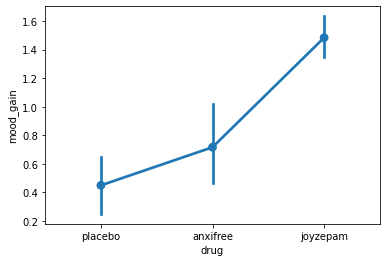

In [3]:
sns.pointplot(data = df, x = 'drug', y = 'mood_gain')

This data calls for a one-way ANOVA, and `pingouin` makes it quite easy. In fact, `pingouin` adds extra superpowers to our `pandas` dataframe, so that it can now compute ANOVA's for us:

In [27]:
# our outcome measure, or "dependent variable" (dv) is mood_gain
# our between-subjects predictor variable is "drug"

df.anova(dv = 'mood_gain', between = 'drug', detailed=True)


,Source,SS,DF,MS,F,p-unc,np2
0,drug,3.453333,2,1.726667,18.610778,0.000086,0.712762
1,Within,1.391667,15,0.092778,NaN,NaN,NaN


To report an ANOVA, we need to report the F-value, the p-value, and two different degrees of freedom: one for predictor variable, and one for the participants. `pingouin` provides these for us, so all we need to do is find them in the ANOVA table (above). To report our results, we can write: "A one-way analysis of variance showed a significant effect of drug (F(2,15) = 18.61, p = 0.000086)."

The "p-unc" in the table is our p-value. The "unc" means uncorrected for multiple comparisons, which is fine, because we haven't done any multiple comparisons yet. If we do want to do some post-hoc t-tests, we use the `pairwise_ttests` functionality which `pingouin` has added to our dataframe. To specify what kind of correction for multiple comparisons we want to use, we use the `padjust` argument. Here we are doing a Bonferroni correction:

In [18]:
df.pairwise_ttests(dv = 'mood_gain', between = 'drug', padjust = 'bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,drug,anxifree,joyzepam,False,True,-4.206222,10.0,two-sided,0.001811,0.005432,bonf,17.947,-2.241659
1,drug,anxifree,placebo,False,True,1.354183,10.0,two-sided,0.205486,0.616459,bonf,0.814,0.721696
2,drug,joyzepam,placebo,False,True,7.168708,10.0,two-sided,0.000030,0.000091,bonf,475.231,3.820482


## Two-way ANOVA

What if, instead of just taking a medication (or placebo), the participants were also offered some counseling therapy? Let's say half the participants from each medication group also received some cognitive behavioural therapy (CBT) while the other half did not. Now we have two predictor variables: `drug` and `therapy`. As before, let's inspect and plot the data..

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/clintrial.csv')
df.head()

,drug,therapy,mood_gain
0,placebo,no.therapy,0.5
1,placebo,no.therapy,0.3
2,placebo,no.therapy,0.1
3,anxifree,no.therapy,0.6
4,anxifree,no.therapy,0.4


<AxesSubplot:xlabel='drug', ylabel='mood_gain'>

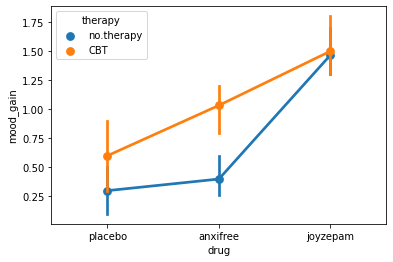

In [22]:
sns.pointplot(data = df, x = 'drug', y = 'mood_gain', hue = 'therapy')

Just like before, we have one _dependent variable_, mood_gain. But now we have two _between subjects_ variables: drug and therapy. Otherwise, the syntax is pretty much the same as for the one-way ANOVA:

In [28]:
df.anova(dv="mood_gain", between=["drug", "therapy"])


,Source,SS,DF,MS,F,p-unc,np2
0,drug,3.453333,2,1.726667,31.714286,0.000016,0.840909
1,therapy,0.467222,1,0.467222,8.581633,0.012617,0.416956
2,drug * therapy,0.271111,2,0.135556,2.489796,0.124602,0.293269
3,Residual,0.653333,12,0.054444,NaN,NaN,NaN


Now we two effects to report: the effect of `drug` and the effect of `therapy`. These are called "main effects", and we can report them just like for the one-way ANOVA:

"There was a significant main effect of drug (F(2,12) = 31.71, p = 0.000016) and a significant main effect of therapy (F(1,12) = 8.58, p = 0.01). There was no significant interaction between drug and therapy (F(2,12) = 2.48, p = 0.12)."

If we want to do post-hoc t-tests, we can do the same thing as before, just with the addition of the extra predictor:

In [30]:
df.pairwise_ttests(dv = 'mood_gain', between=["drug", "therapy"], padjust = 'bonf')

,Contrast,drug,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,drug,-,anxifree,joyzepam,False,True,-4.206222,10.0,two-sided,0.001811,0.005432,bonf,17.947,-2.241659
1,drug,-,anxifree,placebo,False,True,1.354183,10.0,two-sided,0.205486,0.616459,bonf,0.814,0.721696
2,drug,-,joyzepam,placebo,False,True,7.168708,10.0,two-sided,0.000030,0.000091,bonf,475.231,3.820482
3,therapy,-,CBT,no.therapy,False,True,1.306757,16.0,two-sided,0.209767,NaN,NaN,0.732,0.586677
4,drug * therapy,anxifree,CBT,no.therapy,False,True,3.800000,4.0,two-sided,0.019104,0.057311,bonf,3.449,2.482150
5,drug * therapy,joyzepam,CBT,no.therapy,False,True,0.171499,4.0,two-sided,0.872158,1.000000,bonf,0.567,0.112022
6,drug * therapy,placebo,CBT,no.therapy,False,True,1.441153,4.0,two-sided,0.222983,0.668949,bonf,0.922,0.941357


## One-way Repeated Measures ANOVA

It makes no sense to have the same people in the anxifree and placebo condition, or in the therapy and no therapy conditions, but often there are good reasons to have the same people in multiple conditions. In this case, we need to account for the fact that some of the total variance is shared between conditions (because the same people are in more than one condition, just like in a paired t-test). In this case, we need a _repeated-measures_ ANOVA.

Below, let's use some agricultural data. These data (taken from Renesh Bedre's website) show leaf-counts on 5 different plants at 5 points in time: week 1, week 3, etc. We could also imagine that these were three particpants measured on some task at different time points, or on different tasks in the same session. The important thing is that the measure is the same (leaf-count, reaction time, whatever), and the same particpant (plant or person) is measured in each condition (w1, w2, etc.).

In [35]:

df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/plants_leaves.csv")
df.head()

,Id,W1,W2,W3,W4,W5
0,P1,4,5,6,8,10
1,P2,3,4,6,6,9
2,P3,6,7,9,10,12
3,P4,5,7,8,10,12
4,P5,5,6,7,8,10


<AxesSubplot:>

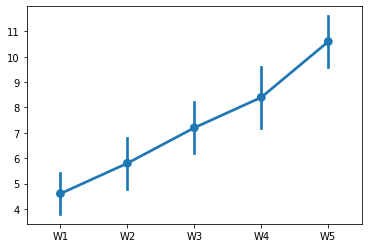

In [36]:
sns.pointplot(data = df)

Because these data are in wide format (one column per condition, with one row per particpant) we can use an even simpler command:

In [37]:
df.rm_anova()

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,Within,4,16,146.27027,2.214820e-12,0.973381,0.541964


Had the data been in long format, the commands should look fairly familiar:

In [47]:
# "Melt" the data from wide format to long format:
df = pd.melt(df, id_vars="Id")
df.rename(columns = {'variable':'week', 'value':'leaf_count'}, inplace = True)
df.head()

,Id,week,leaf_count
0,P1,W1,4
1,P2,W1,3
2,P3,W1,6
3,P4,W1,5
4,P5,W1,5


In [52]:
df.rm_anova(dv = 'leaf_count', within = 'week', subject = 'Id', detailed = True)

,Source,SS,DF,MS,F,p-unc,np2,eps
0,week,108.24,4,27.060,146.27027,2.214820e-12,0.973381,0.541964
1,Error,2.96,16,0.185,NaN,NaN,NaN,NaN


Either way, the results are the same. We can report them as: "A one-way, repeated-measures ANOVA showed a significant effect of time (F(4,16) = 146.27, p = 0.0000000000021."

## Two-way Repeated Measures ANOVA

Finally, what if we have data from the same participants, with more than one predictor variable? As an example, we can look at data from participants doing a Stroop task. In this experiment, response time was measured from the same participants in four conditions: a reading task with and without interference, and a naming task with and without interference. So:

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/stroop_2021_long.csv")
df.head()

,participant,Condition,Time
0,1,ReadingNoInt,5.79
1,2,ReadingNoInt,5.26
2,3,ReadingNoInt,5.02
3,4,ReadingNoInt,4.87
4,5,ReadingNoInt,4.62


In [55]:
df.rm_anova(dv = 'Time', within = 'Condition', subject = 'participant', detailed = True)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Condition,453.835422,3,151.278474,22.417847,6.284794e-11,2.992157e-07,0.427676,0.582216,False,0.153625,2.415965e-10
1,Error,607.331403,90,6.748127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
aov = pg.rm_anova(dv='DesireToKill',
...                   within=['Disgustingness', 'Frighteningness'],
...                   subject='Subject', data=df)